In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
batch_size=256
image_size=(200, 200)

In [3]:
train_dataset = image_dataset_from_directory("/kaggle/input/architecture-dataset/arcdataset/arcDataset/",
                                             subset='training',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 4794 files belonging to 25 classes.
Using 4315 files for training.


2021-11-30 17:07:57.820373: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-30 17:07:57.931073: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-30 17:07:57.931887: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-30 17:07:57.941058: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [4]:
validation_dataset = image_dataset_from_directory("/kaggle/input/architecture-dataset/arcdataset/arcDataset/",
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 4794 files belonging to 25 classes.
Using 479 files for validation.


In [5]:
class_names = train_dataset.class_names
class_names

['Achaemenid architecture',
 'American Foursquare architecture',
 'American craftsman style',
 'Ancient Egyptian architecture',
 'Art Deco architecture',
 'Art Nouveau architecture',
 'Baroque architecture',
 'Bauhaus architecture',
 'Beaux-Arts architecture',
 'Byzantine architecture',
 'Chicago school architecture',
 'Colonial architecture',
 'Deconstructivism',
 'Edwardian architecture',
 'Georgian architecture',
 'Gothic architecture',
 'Greek Revival architecture',
 'International style',
 'Novelty architecture',
 'Palladian architecture',
 'Postmodern architecture',
 'Queen Anne architecture',
 'Romanesque architecture',
 'Russian Revival architecture',
 'Tudor Revival architecture']

In [6]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
])

2021-11-30 17:08:00.701431: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-30 17:08:10.700525: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1652 of 2048
2021-11-30 17:08:12.841789: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


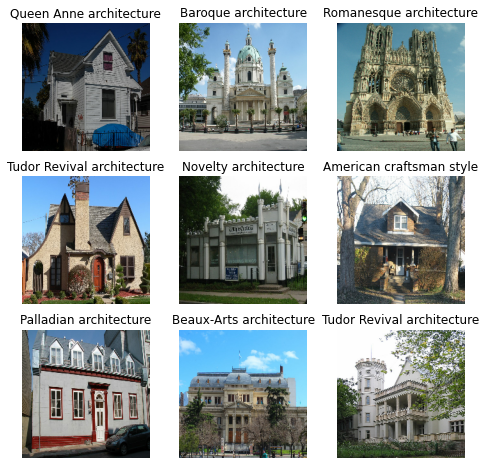

In [7]:
plt.figure(figsize=(8, 8))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [9]:
# Создаем последовательную модель
model = Sequential()
data_augmentation,
# Сверточный слой
model.add(Conv2D(16, (5, 5), padding='same', 
                 input_shape=(200, 200, 3), activation='relu'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(512, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
# Выходной слой, 25 нейронов по количеству классов
model.add(Dense(25, activation='softmax'))

In [10]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [11]:
history = model.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=40,
                    verbose=2)

Epoch 1/40


2021-11-30 17:08:26.439795: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


17/17 - 37s - loss: 7.9488 - accuracy: 0.0749 - val_loss: 3.0875 - val_accuracy: 0.0772
Epoch 2/40
17/17 - 20s - loss: 3.0568 - accuracy: 0.1156 - val_loss: 2.9802 - val_accuracy: 0.1315
Epoch 3/40
17/17 - 21s - loss: 2.9891 - accuracy: 0.1305 - val_loss: 2.8734 - val_accuracy: 0.1441
Epoch 4/40
17/17 - 21s - loss: 2.8175 - accuracy: 0.1708 - val_loss: 2.7679 - val_accuracy: 0.1649
Epoch 5/40
17/17 - 21s - loss: 2.7104 - accuracy: 0.2123 - val_loss: 2.5918 - val_accuracy: 0.2276
Epoch 6/40
17/17 - 20s - loss: 2.5486 - accuracy: 0.2501 - val_loss: 2.4001 - val_accuracy: 0.2944
Epoch 7/40
17/17 - 20s - loss: 2.4058 - accuracy: 0.2902 - val_loss: 2.3146 - val_accuracy: 0.3215
Epoch 8/40
17/17 - 21s - loss: 2.2469 - accuracy: 0.3295 - val_loss: 2.3250 - val_accuracy: 0.3069
Epoch 9/40
17/17 - 21s - loss: 2.1781 - accuracy: 0.3423 - val_loss: 2.2730 - val_accuracy: 0.3152
Epoch 10/40
17/17 - 21s - loss: 2.0416 - accuracy: 0.3919 - val_loss: 2.2301 - val_accuracy: 0.3695
Epoch 11/40
17/17 - 

In [12]:
model.save("arcStyles.h5")